# Exploratory Data Analysis - Assignment 01

You should complete this Jupyter Notebook with your answers. You may need to write code or add explanatory notes.

dataset link: https://www.kaggle.com/datasets/utkarshx27/movies-dataset

In [16]:
# Importing packages and install kaggle package for downloading dataset
import pandas as pd
import numpy as np
# %pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

# Install Kaggle
# %pip install kaggle

# Create a folder to store the dataset
folder_name = 'movies_dataset'
os.makedirs(folder_name, exist_ok=True)

# Download dataset from Kaggle
# !kaggle datasets download -d utkarshx27/movies-dataset -p {folder_name}

# Unzip the dataset into the folder
zip_path = f"{folder_name}/movies-dataset.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(folder_name)

In [42]:
# Load and print head of the dataset
df = pd.read_csv(f"./{folder_name}/movie_dataset.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [3]:
df.columns.tolist()

['index',
 'budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'cast',
 'crew',
 'director']

## Question 1: Challenges in Analyzing Multiple Genres

In this dataset, each movie can have a mix of multiple genres. What challenges does this pose when analyzing the data, and what approaches do you suggest to manage it?

**Hint:** Consider how multi-label data differs from single-label data in analysis and visualization.

<div dir="rtl">

# چالش‌ها و راهکارهای تحلیل داده‌های چندبرچسبی (Multi-Label)

## ۱. چالش‌های تحلیل داده‌های چندبرچسبی

### ۱.۱ پیچیدگی در تحلیل
- در داده‌های چندبرچسبی، هر نمونه می‌تواند به چندین دسته تعلق داشته باشد.  این موضوع تحلیل را پیچیده‌تر می‌کند، زیرا روش‌های سنتی که برای داده‌های تک‌برچسبی (Single-label) طراحی شده‌اند، ممکن است به‌طور مستقیم قابل اعمال نباشند.

### ۱.۲ وابستگی بین برچسب‌ها
- برچسب‌ها در داده‌های چندبرچسبی معمولاً به هم مرتبط هستند.  روش‌های ساده این وابستگی‌ها را نادیده می‌گیرند و ممکن است ترکیب‌های نادرست یا نامعتبر تولید کنند.  
### ۱.۳ ویژگی‌های همپوشانی
- ژانرهای مختلف ممکن است ویژگی‌های مشترکی داشته باشند (مثلاً یک فیلم می‌تواند هم «اکشن» و هم «ماجراجویی» باشد).  این همپوشانی می‌تواند باعث سردرگمی در تحلیل و تفسیر نتایج شود.

### ۱.۴ visualize کردن داده‌ها
- نمایش بصری داده‌های چندبرچسبی دشوار است، زیرا روش‌های معمول مانند نمودارهای میله‌ای یا دایره‌ای برای داده‌های تک‌برچسبی طراحی شده‌اند.  نمودارهای معمول نمی‌توانند همپوشانی برچسب‌ها را به‌خوبی نمایش دهند.

### ۱.۶ ابعاد بالا و پراکندگی داده‌ها
- با افزایش تعداد برچسب‌ها، تعداد ترکیب‌های ممکن به‌صورت نمایی رشد می‌کند.  این موضوع باعث ایجاد داده‌های پراکنده (Sparse Data) شده و همچنین هزینه‌ی محاسباتی یادگیری مدل را افزایش می‌دهد.

### ۱.۷ مقیاس‌پذیری و هزینه‌ی محاسباتی بالا
- با افزایش تعداد برچسب‌ها، هزینه‌ی محاسباتی مدل‌سازی و پیش‌بینی به‌شدت بالا می‌رود.  

### ۱.۸ پیچیدگی در ارزیابی مدل
- معیارهای سنتی مانند «دقت» (Accuracy) برای داده‌های چندبرچسبی مناسب نیستند.   زیرا هر یک ممکن است دارای تعدادی برچسب درست و تعدادی برچسب اشتباه باشد. که برای همه یک مقدار درست یا نادرست درنظر گرفته میشود. این معیارها ممکن است بخشی از برچسب‌های درست را در نظر نگیرند.  

## ۲. راهکارهای پیشنهادی برای تحلیل داده‌های چندبرچسبی

### ۲.۱ استفاده از روش‌های چندبرچسبی
- از الگوریتم‌های مخصوص داده‌های چندبرچسبی مانند Binary Relevance، Classifier Chains یا MLkNN استفاده کنیم.  این روش‌ها به‌طور خاص برای مدیریت داده‌هایی طراحی شده‌اند که هر نمونه می‌تواند چندین برچسب داشته باشد.

### ۲.۲ مدل‌سازی وابستگی بین برچسب‌ها
- به جای استفاده از مدل‌های ساده مانند Binary Relevance، از روش‌هایی مانند **Classifier Chains** یا شبکه‌های عصبی عمیق (مانند RNN یا Transformer) استفاده کنیم.  این روش‌ها می‌توانند روابط بین برچسب‌ها را به‌طور مؤثرتری یاد بگیرند.   روش‌هایی مانند **Ensemble of Classifier Chains (ECC)** نیز می‌توانند باعث بهبود نتایج شوند.

### ۲.۳ تبدیل داده‌ها
- می‌توانیم داده‌ها را به فرمت باینری تبدیل کنیم، به‌طوری که هر ستون نشان‌دهنده‌ی یک ژانر باشد و مقدار ۱ یا ۰ نشان‌دهنده‌ی حضور یا عدم حضور آن ژانر در فیلم باشد.  
- این روش به عنوان   **One-Hot Encoding چندبرچسبی**   شناخته می‌شود.

### ۲.۴ تحلیل جداگانه‌ی ژانرها
- هر ژانر را به‌طور جداگانه تحلیل کرده و سپس نتایج را ترکیب کنیم.  این روش می‌تواند به درک بهتر تأثیر هر ژانر کمک کند.

### ۲.۵ visualize کردن داده‌ها 
- برای نمایش داده‌های چندبرچسبی، از نمودارهای خاص مانند نمودار ون (Venn Diagram) یا نمودار شبکه‌ای (Network Graph) استفاده کنیم.  این نمودارها می‌توانند روابط بین ژانرها را به‌طور واضح‌تری نشان دهند.

### ۲.۶ کاهش ابعاد داده‌ها
- اگر تعداد ژانرها زیاد است، می‌توانید از روش‌های کاهش ابعاد مانند **PCA** یا **t-SNE** برای ساده‌سازی داده‌ها و تجسم بهتر آن‌ها استفاده کنیم.  این روش‌ها به کاهش پیچیدگی و افزایش کارایی مدل کمک می‌کنند.

### ۲.۷ استفاده از معیارهای ارزیابی مناسب
- به جای معیار دقت ساده، از **Hamming Loss**، **F1-Score**، **Jaccard Index** و سایر معیارهای مناسب برای تحلیل بهتر عملکرد مدل استفاده کنید.

</div>


## Question 2: Missing Keywords Analysis

What percentage of movies are missing keywords? In what systems could this be a problem? What methods do you suggest to complete this incomplete data?

**Hint:** Identify missing values and think about how they might impact recommendation systems or search functionalities.

In [4]:
number_of_missing_keywords = df['keywords'].isnull().sum()
total_number = len(df)
percentage = (100 * number_of_missing_keywords / total_number) if total_number > 0 else 0

print(f'Number of missing keywords: {number_of_missing_keywords}')
print(f'Percentage: {percentage:.2f}%')


Number of missing keywords: 412
Percentage: 8.58%



## 1 : In what systems could this be a problem?
<div dir="rtl">

### سیستم‌های پیشنهاد فیلم
- سیستم‌های پیشنهاددهی معمولاً از کلیدواژه‌ها برای تعیین شباهت بین فیلم‌ها استفاده می‌کنند. نبود کلیدواژه‌ها می‌تواند دقت فیلترینگ مبتنی بر محتوا را کاهش داده و پیشنهادهای نامرتبط ارائه دهد.

### سیستم‌های جستجو و بازیابی اطلاعات
- کلیدواژه‌ها برای موتورهای جستجو در پلتفرم‌های استریم (مانند IMDb و Netflix) ضروری هستند. اگر کلیدواژه‌ها ناقص باشند، برخی فیلم‌ها در نتایج جستجو نمایش داده نمی‌شوند.

### دسته‌بندی و فیلترینگ بر اساس برچسب‌ها
- بسیاری از پلتفرم‌ها از کلیدواژه‌ها برای دسته‌بندی فیلم‌ها (مثلاً "علمی-تخیلی"، "درام"، "اکشن") استفاده می‌کنند. فیلم‌هایی که کلیدواژه ندارند، ممکن است به‌درستی دسته‌بندی نشوند و در لیست‌های مرتبط دیده نشوند.

### مدل‌های یادگیری ماشین برای پیش‌بینی ژانر و محتوا
- مدل‌های یادگیری ماشین که برای پیش‌بینی ژانر یا سلیقه کاربران استفاده می‌شوند، از کلیدواژه‌ها به‌عنوان ویژگی داده بهره می‌برند. نبود کلیدواژه‌ها باعث کاهش دقت مدل‌ها در تشخیص ژانر و موضوع فیلم می‌شود.

### تحلیل احساسات و تشخیص روندهای سینمایی
- کلیدواژه‌ها برای ردیابی روندهای سینمایی (مثلاً افزایش محبوبیت فیلم‌های "آخرالزمانی") ضروری هستند.کمبود این داده‌ها می‌تواند منجر به تحلیل‌های ناقص یا نادرست شود.

</div>

## 2 : What methods do you suggest to complete this incomplete data?
<div dir="rtl">

### استفاده از منابع داده دیگر
- می‌توان از پایگاه‌های داده معتبر مانند IMDb و TMDb برای استخراج و تکمیل کلمات کلیدی استفاده کرد.

### تحلیل متن با پردازش زبان طبیعی (NLP)
- با پردازش توضیحات فیلم، خلاصه داستان و ژانر، می‌توان کلمات کلیدی مناسب را به صورت خودکار استخراج کرد.

### استفاده از یادگیری ماشین
- الگوریتم‌های یادگیری ماشین می‌توانند بر اساس شباهت فیلم‌ها، کلمات کلیدی را پیش‌بینی کرده و برای فیلم‌های ناقص مقداردهی کنند.

### مشارکت کاربران
- امکان ارائه کلمات کلیدی توسط کاربران می‌تواند به بهبود دقت داده‌ها کمک کند، به‌خصوص در پلتفرم‌های مشارکتی مانند Wikipedia یا Letterboxd.

</div>

## Question 3: Correlation Between Budget and Popularity

Do you think there is a strong correlation between a film’s budget and its popularity? Use a graph or statistical calculations to explore this relationship and interpret the results.

**Hint:** A scatter plot and correlation coefficient might help in identifying the relationship.

Number of missing data in budget: 0
Number of missing data in popularity: 0
Scaling complete.
correlation : 0.51  --->  positive


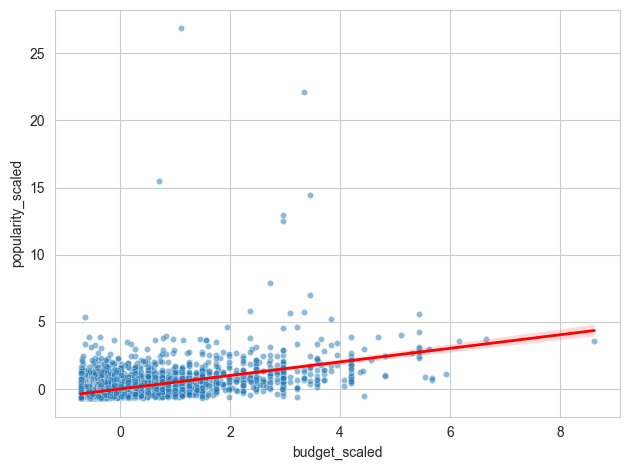

In [5]:
sns.set_style("whitegrid")

budget, popularity = df['budget'], df['popularity']

print(f'Number of missing data in budget: {budget.isnull().sum()}')
print(f'Number of missing data in popularity: {popularity.isnull().sum()}')

print('========')

# Scaling data (Standardization: Z-score normalization)  --> for better visualization
budget_mean, budget_std = budget.mean(), budget.std(ddof=0)
popularity_mean, popularity_std = popularity.mean(), popularity.std(ddof=0)

df['budget_scaled'] = (df['budget'] - budget_mean) / budget_std
df['popularity_scaled'] = (df['popularity'] - popularity_mean) / popularity_std

print('Scaling complete.')

print('========')

correlation = df['budget'].corr(df['popularity'])
# correlation = df['budget_scaled'].corr(df['popularity_scaled'])
print(f'correlation : {correlation:.2f}',end='  --->  ')
if correlation>0:
    print('positive')
elif correlation==0:
    print('none')
else:
    print('negetive')

print('========')

sns.scatterplot(x=df['budget_scaled'], y=df['popularity_scaled'], alpha=0.5, s=20)
sns.regplot(x=df['budget_scaled'], y=df['popularity_scaled'], scatter=False, color='red', line_kws={"linewidth": 2})

plt.tight_layout()
plt.show()



<div dir="rtl">

## تحلیل ضریب همبستگی (0.51)
- مقدار 0.51 نشان می‌دهد که بین بودجه و محبوبیت همبستگی متوسط و مثبت وجود دارد.
- این یعنی فیلم‌هایی که بودجه‌ی بیشتری دارند، تمایل دارند محبوب‌تر شوند، اما این رابطه کاملاً قطعی نیست.

### تفسیر:

- همبستگی قوی نیست (مثلاً ۰.۸ یا بیشتر)، بنابراین عوامل دیگری مانند بازیگران، تبلیغات، داستان و نقدهای منتقدان نیز در محبوبیت فیلم نقش دارند.
- همبستگی صفر نیست، پس می‌توان گفت که افزایش بودجه معمولاً با افزایش محبوبیت همراه است، اما همیشه این‌طور نیست.

## تحلیل نمودار پراکندگی

- شیب کم صعودی نشان می‌دهد که روند کلی، افزایش محبوبیت با افزایش بودجه است، اما داده‌ها پراکندگی دارند.
- احتمالاً برخی فیلم‌ها با بودجه‌ی پایین، محبوبیت بالایی دارند و برخی فیلم‌های پرهزینه موفق نمی‌شوند.
- وجود نقاط دورافتاده (Outliers) ممکن است بر مقدار همبستگی تأثیر گذاشته باشد.

</div>

## Question 4: Visualizing Popularity of Different Genres

What type of graph would you use to show the popularity of different genres, and why?

<div dir="rtl">
    
## نمودارهای پیشنهادی:
    
### نمودار میله‌ای افقی(Horizontal Bar Chart)

 #### چرا؟
   - فراوانی هر ژانر را به وضوح نشان می‌دهد
   - مقایسه مقادیر بین ژانرها را آسان می‌کند

#### بهترین کاربرد:
  - نمایش تعداد مطلق یا درصد آیتم‌ها در هر ژانر

</div>

In [43]:
df['genres_list'] = df['genres'].apply(lambda x: x.split() if  isinstance(x, str) else [])
df['genres_list'].head(2)

0    [Action, Adventure, Fantasy, Science, Fiction]
1                      [Adventure, Fantasy, Action]
Name: genres_list, dtype: object

In [44]:
flat_genres = [genre for sublist in df['genres_list'] for genre in sublist]
genre_counts = pd.Series(flat_genres).value_counts()
genres = genre_counts.index.tolist()
genres

['Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Romance',
 'Adventure',
 'Crime',
 'Science',
 'Fiction',
 'Horror',
 'Family',
 'Fantasy',
 'Mystery',
 'Animation',
 'History',
 'Music',
 'War',
 'Documentary',
 'Western',
 'Foreign',
 'TV',
 'Movie']

In [55]:
df_genres = pd.DataFrame(np.zeros(len(genres)),index=genres,columns=['mean_popularity'])
for i in genres:
    df_genres.loc[i,'mean_popularity'] = df[df['genres'].str.contains(i, na=False)]['popularity'].mean()
df_genres.head(2)

,mean_popularity
Drama,17.764853
Comedy,18.221001


<Figure size 1500x1500 with 0 Axes>

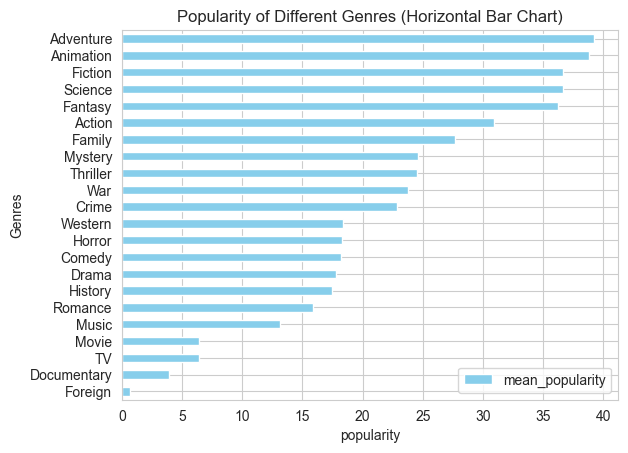

In [59]:
# using popularity of genre
# 1. Horizontal Bar Chart
plt.figure(figsize=(15,15))
df_genres.sort_values(by='mean_popularity').plot(kind='barh', color='skyblue')
plt.title('Popularity of Different Genres (Horizontal Bar Chart)')
plt.xlabel('popularity')
plt.ylabel('Genres')
plt.show()

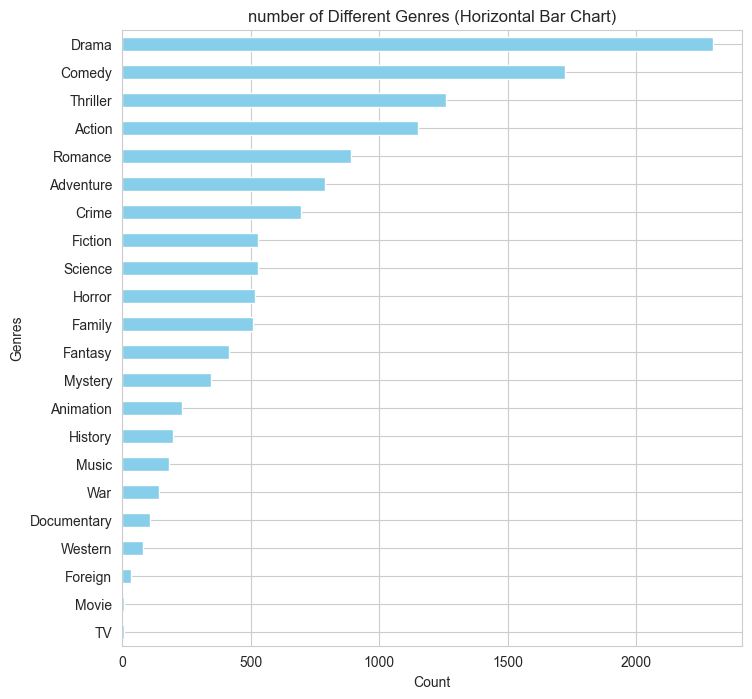

In [60]:
# using number of genres
# 1. Horizontal Bar Chart
plt.figure(figsize=(8,8))
genre_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('number of Different Genres (Horizontal Bar Chart)')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

## Question 5: Analyzing Average Movie Budget

How would you calculate the average budget for movies, and what insights can this provide?
Calculate the mean budget for all movies and visualize the distribution using an appropriate plot. Explain any trends or patterns you observe.

In [72]:
mean_budget = df['budget'].mean()
print(f"The average movie budget is ${mean_budget:,.2f}")

The average movie budget is $29,045,039.88


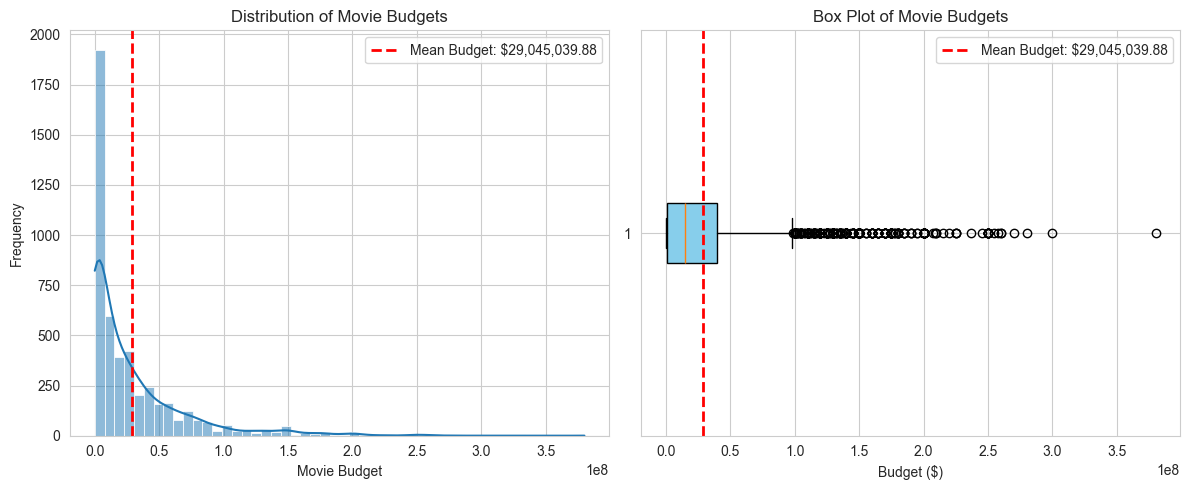

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Histogram ---
sns.histplot(df['budget'], bins=50, kde=True, ax=axes[0])
axes[0].axvline(mean_budget, color='red', linestyle='dashed', linewidth=2, label=f'Mean Budget: ${mean_budget:,.2f}')
axes[0].set_xlabel('Movie Budget')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Movie Budgets')
axes[0].legend()

# --- Box Plot ---
axes[1].boxplot(df['budget'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axes[1].axvline(mean_budget, color='red', linestyle='dashed', linewidth=2, label=f'Mean Budget: ${mean_budget:,.2f}')
axes[1].set_title('Box Plot of Movie Budgets')
axes[1].set_xlabel('Budget ($)')
axes[1].legend()

plt.tight_layout()
plt.show()

<div dir='rtl'>

## تحلیل نتایج دو نمودار (هیستوگرام و نمودار جعبه‌ای) بودجه فیلم‌ها

### **توزیع نامتقارن و چولگی به سمت راست:**  

- در **نمودار هیستوگرام** مشاهده می‌شود که بیشتر فیلم‌ها بودجه پایینی دارند، در حالی که تعداد کمی از فیلم‌ها دارای بودجه‌های بسیار بالا هستند. این نشان می‌دهد که **توزیع بودجه فیلم‌ها دارای چولگی به سمت راست است**، یعنی مقدار کمی از فیلم‌ها با بودجه‌های بالا تأثیر زیادی روی میانگین دارند.  

- **خط قرمز (میانگین بودجه)** در بخش ابتدایی توزیع قرار دارد، اما مقدار آن بالاتر از میانه داده‌ها به نظر می‌رسد. این به دلیل وجود برخی فیلم‌های پرهزینه است که میانگین را افزایش داده‌اند.  

### **وجود داده‌های پرت و فیلم‌های بسیار پرهزینه:**  

- در **نمودار جعبه‌ای (Box Plot)**، مستطیل جعبه‌ای بیشتر در ناحیه بودجه‌های پایین متمرکز است، اما داده‌های پرت (دایره‌های بیرون از جعبه) نشان می‌دهند که برخی فیلم‌ها دارای بودجه‌هایی هستند که به‌طور قابل‌توجهی بیشتر از بقیه فیلم‌هاست.  

- این موضوع تأیید می‌کند که **بیشتر فیلم‌ها بودجه‌های محدودی دارند، اما تعداد کمی از فیلم‌ها (که نقاط پرت هستند) دارای هزینه‌های هنگفتی هستند.**  

### **مقایسه میانگین و پراکندگی بودجه‌ها:**  

- **میانگین بودجه (خط قرمز) بالاتر از حد وسط جعبه است،** که نشان می‌دهد بودجه‌های بسیار بالا روی میانگین تأثیر زیادی گذاشته‌اند. این مقدار احتمالاً برای نشان دادن "مقدار معمول بودجه" خیلی مناسب نیست. در چنین توزیع‌هایی، **میانه (Median) معیار بهتری برای نمایش بودجه معمول فیلم‌ها است.**  

- **طول بازوهای جعبه** نشان می‌دهد که بودجه اکثر فیلم‌ها در یک بازه محدود قرار دارد، اما برخی فیلم‌ها تفاوت فاحشی با بقیه دارند.  

</div>

## Question 6: Identifying Directors with the Highest Average Movie Budget

Which director has the highest mean budget for their movies, and how would you determine this?

In [88]:
print('solution 1 : ')
print(df.groupby('director')['budget'].mean().sort_values(ascending=False).index[0])

print('solution 2 : ')
top_director = df.groupby('director')['budget'].mean().sort_values(ascending=False).idxmax()
top_budget = df.groupby('director')['budget'].mean().max()

print(f"The director with the highest average movie budget is: {top_director}")
print(f"Average Budget: ${top_budget:,.2f}")


solution 1 : 
Byron Howard
solution 2 : 
The director with the highest average movie budget is: Byron Howard
Average Budget: $260,000,000.00


## Question 7: Exploring the Relationship Between Genre and Revenue

First, calculate the revenue-to-budget ratio for all movies and identify the top 100 movies with the highest ratios. Then, analyze whether there is a meaningful relationship between genre and revenue in these movies. Use appropriate statistical methods or visualizations to support your findings.

In [99]:
df_temp = df[df['budget'] > 0]  # Remove movies with zero budget to avoid division errors
df_temp['revenue_ratio'] = df_temp['revenue'] / df_temp['budget']
top_100 = df_temp.nlargest(100, 'revenue_ratio')
top_100.original_title.head(2)

4238    Modern Times
3137       Nurse 3-D
Name: original_title, dtype: object

In [110]:
df_gr = pd.DataFrame(index=genres,columns=['mean_revenue','median_revenue'])
for i in genres:
    df_gr.loc[i,'mean_revenue'] = df[df['genres'].str.contains(i, na=False)]['revenue'].mean()
    df_gr.loc[i, 'median_revenue'] = df[df['genres'].str.contains(i, na=False)]['revenue'].median()
df_gr.head(2)

,mean_revenue,median_revenue
Drama,68156998.976919,24748670.0
Comedy,91847517.110603,38119483.0


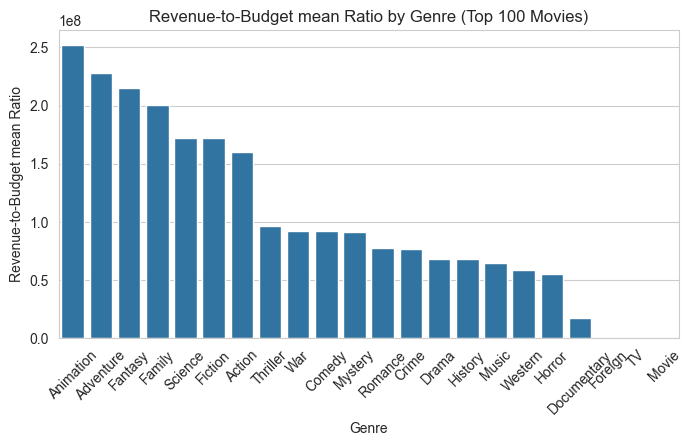

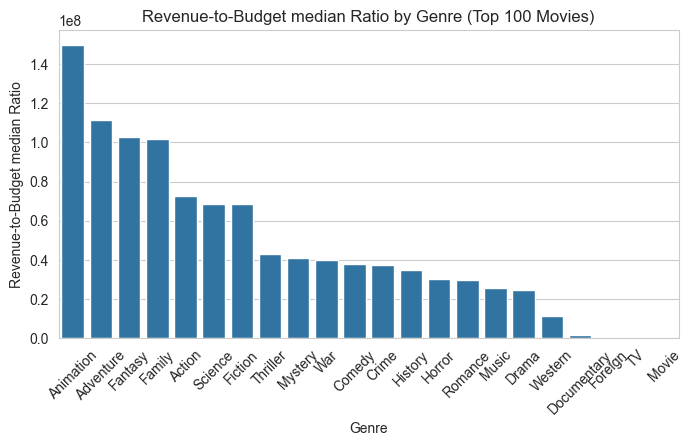

In [115]:
# Visualize the distribution of revenue ratio across genres
plt.figure(figsize=(8,4))
df_gr = df_gr.sort_values(by='mean_revenue',ascending=False)
sns.barplot(x=df_gr.index, y='mean_revenue', data=df_gr)
plt.xticks(rotation=45)
plt.title("Revenue-to-Budget mean Ratio by Genre (Top 100 Movies)")
plt.xlabel("Genre")
plt.ylabel("Revenue-to-Budget mean Ratio")
plt.show()

plt.figure(figsize=(8,4))
df_gr = df_gr.sort_values(by='median_revenue',ascending=False)
sns.barplot(x=df_gr.index, y='median_revenue', data=df_gr)
plt.xticks(rotation=45)
plt.title("Revenue-to-Budget median Ratio by Genre (Top 100 Movies)")
plt.xlabel("Genre")
plt.ylabel("Revenue-to-Budget median Ratio")
plt.show()

In [122]:
from scipy.stats import kruskal

genre_groups = [df[df['genres'].str.contains(g, na=False)]['revenue_ratio'].dropna() for g in genres]
stat, p_value = kruskal(*genre_groups)
print(f"Kruskal-Wallis Test: H-statistic={stat:.3f}, p-value={p_value:.5f}")

if p_value < 0.05:
    print("There is a statistically significant difference in revenue-to-budget ratios across genres.")
else:
    print("No statistically significant difference in revenue-to-budget ratios across genres.")


Kruskal-Wallis Test: H-statistic=96.593, p-value=0.00000
There is a statistically significant difference in revenue-to-budget ratios across genres.


<div dir='rtl'>

## تحلیل نتایج
- p-value کوچک‌تر از 0.05: با توجه به اینکه مقدار p-value برابر با 0.00000 است، می‌توان نتیجه گرفت که نتیجه آزمون آماری از نظر آماری معنادار است. به عبارت دیگر، این نتیجه نشان‌دهنده آن است که رابطه‌ای معنادار میان ژانر فیلم‌ها و درآمد آن‌ها وجود دارد.
- H-statistic بالا: مقدار بالای H-statistic نیز حاکی از این است که تفاوت‌ها در میان گروه‌های ژانر فیلم‌ها قابل توجه است و نمی‌توان آن‌ها را تصادفی دانست.

## نتیجه‌گیری
- با توجه به نتایج آزمون آماری، می‌توان نتیجه گرفت که ژانر فیلم‌ها تأثیر قابل توجهی بر درآمد آن‌ها دارد. این رابطه به این معنی است که برخی ژانرها ممکن است عملکرد بهتری نسبت به دیگر ژانرها از نظر درآمد داشته باشند. این اطلاعات می‌تواند به تهیه‌کنندگان و سرمایه‌گذاران فیلم کمک کند تا در انتخاب ژانرها برای پروژه‌های آینده تصمیمات بهتری بگیرند.

</div>

## Question 8: Additional Analysis Opportunities

If you were to use this dataset to conduct a new analysis, what interesting questions could you ask? What patterns or relationships could you look for? Explain your ideas and how these analyses could be conducted.

<div dir='rtl'>

# تحلیل‌هایی برای مجموعه داده فیلم‌ها

## ۱. بررسی روند موفقیت کارگردانان
- **سوال تحقیقاتی**: آیا کارگردانان خاصی وجود دارند که به طور مداوم فیلم‌های با امتیاز بالا تولید می‌کنند؟
- **روش تحلیل**:
  - محاسبه میانگین امتیاز فیلم‌ها برای هر کارگردان
  - مقایسه تعداد فیلم‌ها و کیفیت آنها
  - شناسایی کارگردانان برتر از نظر کیفیت و کمیت

## ۲. تحلیل ارتباط بودجه با موفقیت فیلم
- **سوال تحقیقاتی**: آیا رابطه مستقیمی بین بودجه فیلم و امتیاز IMDB وجود دارد؟
- **روش تحلیل**:
  - رسم نمودار پراکندگی بین بودجه و امتیاز
  - محاسبه ضریب همبستگی
  - بررسی تفاوت در ژانرهای مختلف

## ۳. الگوهای زمانی در صنعت سینما
- **سوال تحقیقاتی**: آیا روندهای مشخصی در تولید فیلم در طول زمان وجود دارد؟
- **روش تحلیل**:
  - تحلیل توزیع فیلم‌ها در سال‌های مختلف
  - بررسی تغییرات در ژانرهای محبوب
  - مطالعه تحولات صنعت سینما از نظر کیفیت و کمیت

## ۴. تحلیل ژانرها
- **سوال تحقیقاتی**: کدام ژانرها محبوب‌ترین و موفق‌ترین هستند؟
- **روش تحلیل**:
  - شمارش تعداد فیلم‌ها در هر ژانر
  - محاسبه میانگین امتیاز برای هر ژانر
  - بررسی تغییرات محبوبیت ژانرها در طول زمان

## ۵. تحلیل جنسیتی در سینما
- **سوال تحقیقاتی**: توزیع بازیگران زن و مرد در فیلم‌ها چگونه است؟
- **روش تحلیل**:
  - شمارش بازیگران بر اساس جنسیت
  - بررسی نقش‌های اصلی و فرعی
  - مقایسه امتیازات فیلم‌ها با توجه به ترکیب جنسیتی بازیگران

## ۶. تحلیل اقتصادی سینما
- **سوال تحقیقاتی**: چه عواملی بر بازگشت سرمایه (ROI) فیلم‌ها تأثیر می‌گذارند؟
- **روش تحلیل**:
  - محاسبه نسبت درآمد به بودجه
  - بررسی تأثیر ژانر، بازیگران، و کارگردان بر بازگشت سرمایه
  - شناسایی فیلم‌های با بیشترین بازدهی اقتصادی

## ۷. تحلیل زبان و فرهنگ
- **سوال تحقیقاتی**: چه ارتباطی بین زبان فیلم، فرهنگ و امتیاز IMDB وجود دارد؟
- **روش تحلیل**:
  - مقایسه امتیازات فیلم‌های با زبان‌های مختلف
  - بررسی تنوع فیلم‌های بین‌المللی
  - تحلیل موفقیت فیلم‌های غیرانگلیسی زبان

## ۸. تحلیل شبکه همکاری
- **سوال تحقیقاتی**: آیا الگوهای همکاری خاصی میان بازیگران و کارگردانان وجود دارد؟
- **روش تحلیل**:
  - ایجاد گراف همکاری
  - شناسایی مرکزی‌ترین بازیگران و کارگردانان
  - بررسی تکرار همکاری‌ها و تأثیر آن بر کیفیت فیلم

## ۹. تحلیل تغییرات تکنولوژیکی
- **سوال تحقیقاتی**: چگونه پیشرفت‌های تکنولوژیکی بر کیفیت و سبک فیلم‌ها تأثیر گذاشته‌اند؟
- **روش تحلیل**:
  - مقایسه امتیازات فیلم در دهه‌های مختلف
  - بررسی تأثیر جلوه‌های ویژه
  - تحلیل تغییرات در تکنیک‌های فیلمبرداری

## ۱۰. تحلیل محتوای اجتماعی
- **سوال تحقیقاتی**: چگونه موضوعات اجتماعی در فیلم‌ها طی زمان تغییر کرده‌اند؟
- **روش تحلیل**:
  - تحلیل محتوای کلیدواژه‌ها و خلاصه فیلم‌ها
  - شناسایی روندهای موضوعی
  - بررسی ارتباط موضوعات اجتماعی با امتیاز فیلم

## ۱۱. تحلیل فصلی و زمان انتشار
- **سوال تحقیقاتی**: آیا زمان انتشار فیلم بر موفقیت آن تأثیر دارد؟
- **روش تحلیل**:
  - مقایسه امتیازات فیلم‌های منتشر شده در فصول مختلف
  - بررسی تأثیر تعطیلات و فصل‌ها
  - تحلیل استراتژی‌های زمان‌بندی انتشار

## ۱۲. تحلیل سبک‌شناسی
- **سوال تحقیقاتی**: چه سبک‌های بصری و روایی در فیلم‌ها غالب هستند؟
- **روش تحلیل**:
  - بررسی طول فیلم‌ها
  - تحلیل تنوع ژانرها در یک فیلم
  - مطالعه تغییرات سبک‌شناسی در طول زمان
    
</div>